In [1]:
# Import libraries and dependencies
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline


#Linear Regression Forecasting

#In this notebook, you will build a Scikit-Learn linear regression model to predict CAD/JPY returns with 
#lagged CAD/JPY futures returns and categorical calendar seasonal effects (e.g., day-of-week or week-of-year seasonal effects).

#Follow the steps outlined in the regression_analysis starter notebook to complete the following:

#1 Data preparation (creating returns and lagged returns, and splitting the data into training and testing data)
#Fitting a linear regression model.

#Making predictions using the testing data.
#Out-of-sample performance.
#In-sample performance.

#Use the results of the linear regression analysis and modelling to answer the following question:

# 1 Does this model perform better or worse on out-of-sample data compared to in-sample data?




In [4]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [5]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


In [18]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s

cad_jpy_df['Return'] = (cad_jpy_df[["Price"]].pct_change() * 100)
# Drop NaN values
returns = cad_jpy_df.dropna()
returns.head()

,Price,Open,High,Low,Return
Date,,,,,
1990-01-04,123.46,123.41,123.46,123.41,-1.468476
1990-01-05,124.54,124.48,124.54,124.48,0.874777
1990-01-08,124.27,124.21,124.27,124.21,-0.216798
1990-01-09,125.10,125.04,125.10,125.04,0.667901
1990-01-10,125.81,125.75,125.81,125.75,0.567546


In [19]:
# Create a lagged return using the shift function
cad_jpy_df['Lagged_Return'] = returns['Return'].shift()
cad_jpy_df = cad_jpy_df.dropna()
cad_jpy_df.head()

,Price,Open,High,Low,Return,Lagged_Return
Date,,,,,,
1990-01-05,124.54,124.48,124.54,124.48,0.874777,-1.468476
1990-01-08,124.27,124.21,124.27,124.21,-0.216798,0.874777
1990-01-09,125.10,125.04,125.10,125.04,0.667901,-0.216798
1990-01-10,125.81,125.75,125.81,125.75,0.567546,0.667901
1990-01-11,125.85,125.80,125.85,125.80,0.031794,0.567546


In [20]:
#Train Test Split

# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = cad_jpy_df[:'2017']
test = cad_jpy_df['2018':]

In [21]:
 # Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):

X_train = train["Lagged_Return"].to_frame()
X_test = test["Lagged_Return"].to_frame()
y_train = train["Return"]
y_test = test["Return"]

In [22]:
#Preview X train head
X_train.head()

,Lagged_Return
Date,
1990-01-05,-1.468476
1990-01-08,0.874777
1990-01-09,-0.216798
1990-01-10,0.667901
1990-01-11,0.567546


In [24]:
### Linear Regression Model###

# Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
#Make predictions using the Testing Data


###Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

# Make a prediction of "y" values using just the test dataset
predictions = model.predict(X_test)

In [28]:
predictions

array([ 5.70066117e-03, -7.17266865e-03,  5.57943874e-04, -1.15669834e-03,
       -1.63080155e-02, -2.44564838e-02,  1.38182261e-03,  1.77296071e-02,
        4.39825675e-02, -2.60438703e-03, -8.66670277e-03,  4.88646536e-03,
        2.30282007e-03, -1.87805742e-02, -1.44452247e-03,  2.14996952e-02,
       -1.38903468e-02,  7.76509404e-03,  1.06826056e-02,  1.45033837e-03,
        5.81227935e-04, -8.70791983e-04,  2.61602890e-03, -1.48370536e-02,
       -1.59190044e-02,  1.58158945e-02,  4.51731677e-02, -2.15121011e-02,
        2.07758918e-02,  1.97800096e-02, -7.41370010e-03,  1.79904459e-03,
        2.22918916e-02, -2.36910426e-03,  1.79969257e-02,  1.05940363e-02,
       -6.62893328e-03, -8.70791983e-04, -2.66028938e-04,  2.36278852e-02,
       -1.91928884e-02,  8.22530727e-03,  8.56194816e-03,  2.60048144e-02,
        1.11660584e-02,  1.89750829e-02,  5.06687485e-03, -1.65324717e-02,
        7.22387552e-03, -7.11716394e-03, -3.20268095e-02,  1.45203405e-02,
        1.95680969e-02,  

In [29]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Return"] = predictions

In [30]:
Results

,Return,Predicted Return
Date,,
2018-01-01,0.245591,0.005701
2018-01-02,-0.055679,-0.007173
2018-01-03,0.011142,0.000558
2018-01-04,0.601604,-0.001157
2018-01-05,0.919158,-0.016308
...,...,...
2020-05-29,0.076697,0.002078
2020-06-01,1.251756,-0.002839
2020-06-02,1.425508,-0.032991


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

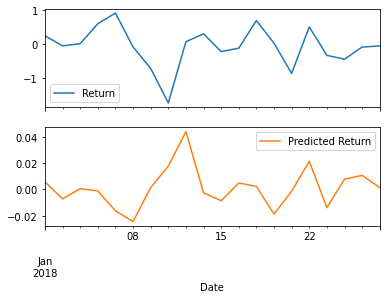

In [31]:
 # Plot the first 20 predictions parallel to the true values to see how it performed
# The trends lines should be similar
Results[:20].plot(subplots=True)